<a href="https://colab.research.google.com/github/Osterne/codes_book/blob/main/medidas_resumo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

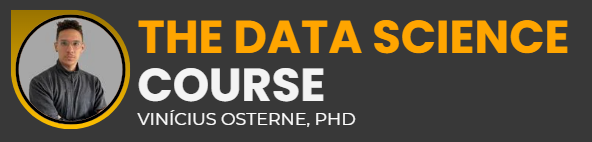


# Análise Descritiva e Exploratória de Dados - Medidas Descritivas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
np.random.seed(42)
n = 100

# Variáveis contínuas (com outliers)
continua1 = np.random.normal(50, 10, n)
continua1[::10] *= 3  # adicionando outliers

continua2 = np.random.normal(30, 5, n)
continua2[::15] *= 2  # adicionando alguns outliers

# Variável categórica
categorica = np.random.choice(['A', 'B', 'C'], size=n)

# Variável discreta
discreta = np.random.poisson(3, n).astype(float)

# Variável binária
binaria = np.random.choice([0, 1], size=n)

# Variável texto
texto = np.random.choice(['Lorem', 'Ipsum', 'Dolor'], size=n)

# Adicionando valores nulos
continua1[5] = np.nan
categorica[15] = np.nan
discreta[25] = np.nan
continua2[35] = np.nan

# Criando o DataFrame
df = pd.DataFrame({
    'continua1': continua1,
    'continua2': continua2,
    'categorica': categorica,
    'discreta': discreta,
    'binaria': binaria,
    'texto': texto
})

print("Shape:", df.shape)
print(df.head())

Shape: (100, 6)
    continua1  continua2 categorica  discreta  binaria  texto
0  164.901425  45.846293          B       1.0        0  Dolor
1   48.617357  27.896773          B       1.0        0  Lorem
2   56.476885  28.286427          A       3.0        1  Lorem
3   65.230299  25.988614          A       5.0        1  Dolor
4   47.658466  29.193571          A       3.0        0  Ipsum


## 📊 Medidas de Tendência Central

As **medidas de tendência central** descrevem onde os dados tendem a se concentrar, indicando o **ponto central** de uma distribuição.

### 🔹 Média
- É a soma de todos os valores dividida pelo número de observações.
- Fórmula:
  $$
  \bar{x} = \frac{\sum_{i=1}^{n} x_i}{n}
  $$
- **Vantagem:** Usa todos os dados, útil para distribuições simétricas.
- **Desvantagem:** Sensível a valores extremos (outliers).

### 🔹 Mediana
- É o valor central que divide a amostra em duas partes iguais.
- **Vantagem:** Robusta a outliers, ideal para distribuições assimétricas.
- **Desvantagem:** Não usa todas as informações dos dados.

### 🔹 Moda
- É o valor mais frequente na amostra.
- **Vantagem:** Útil para dados categóricos e para identificar valores recorrentes.
- **Desvantagem:** Pode haver múltiplas modas ou nenhuma moda definida.

---

### 🔎 Interpretação:
- Quando a distribuição é **simétrica**, média ≈ mediana ≈ moda.
- Quando é **assimétrica**, a média é puxada para o lado da cauda da distribuição.
- Em presença de **outliers**, a **mediana** é geralmente a melhor medida de tendência central.


In [13]:
# ================================================
# Medidas de Tendência Central
# ================================================
for col in df.columns:
    print(f"\n📊 Variável: {col}")
    if pd.api.types.is_numeric_dtype(df[col]):
        print("Média:", df[col].mean())
        print("Mediana:", df[col].median())
        print("Moda:", df[col].mode().tolist())
    else:
        print("Moda:", df[col].mode().tolist())


📊 Variável: continua1
Média: 59.42306238469186
Mediana: 50.05113456642461
Moda: [23.802548959102555, 30.124310853991073, 30.403298761202244, 30.86719755342202, 32.36959844637266, 32.75082167486967, 35.214780096325725, 35.364850518678814, 35.75251813786544, 35.87696298664709, 36.71813951101569, 37.791563500289776, 38.037933759193294, 38.490064225776976, 38.93665025993972, 39.422890710440996, 39.87168879665576, 40.91975924478789, 41.607824767773614, 41.91506397106812, 42.801557916052914, 42.979469061226474, 43.23077999694041, 43.54880245394876, 43.99361310081195, 44.37712470759027, 44.556172754748175, 44.70239796232961, 44.81729781726352, 44.982429564154636, 45.30525614065048, 45.34270246429743, 45.393612290402125, 46.078918468678424, 46.149177195836835, 46.723378534022316, 46.907876241487855, 46.98896304410711, 47.009926495341325, 47.083062502067236, 47.65412866624853, 47.658466252766644, 47.74223699513465, 48.14341023336183, 48.61735698828815, 48.843517176117594, 49.27989878419666, 49

## 📊 Medidas de Dispersão

As **medidas de dispersão** indicam o quanto os dados estão **espalhados ou concentrados** em relação à média.  
Elas ajudam a entender a **variabilidade** da amostra e a confiabilidade das medidas de tendência central.

### 🔹 Variância
- Mede o **quanto os valores se afastam da média**, em média, elevando as diferenças ao quadrado.
- Fórmula:  
  $$
  s^2 = \frac{\sum (x_i - \bar{x})^2}{n-1}
  $$
- **Unidade:** Quadrado da unidade original da variável.

### 🔹 Desvio Padrão
- É a **raiz quadrada da variância**, retornando à mesma unidade dos dados.
- Indica o **desvio médio** em relação à média.
- Quanto maior o desvio padrão, **maior a dispersão**.

### 🔹 Coeficiente de Variação (CV)
- Mede a **dispersão relativa**, comparando o desvio padrão com a média.
- Fórmula:  
  $$
  CV = \frac{\text{Desvio Padrão}}{\text{Média}} \times 100\%
  $$
- Útil para comparar variabilidade entre variáveis com **escalas diferentes**.

---

### 🔎 Interpretação:
- **Variância/Desvio Padrão alto:** Dados muito dispersos.
- **Variância/Desvio Padrão baixo:** Dados próximos da média.
- **CV alto (> 30%)** → Alta variabilidade relativa.
- **CV baixo (< 10%)** → Dados homogêneos.


In [14]:
# ================================================
# Medidas de Dispersão
# ================================================
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        print(f"\n📊 Variável: {col}")
        print("Variância:", df[col].var())
        print("Desvio Padrão:", df[col].std())
        if df[col].mean() != 0 and not np.isnan(df[col].mean()):
            print("Coeficiente de Variação (%):", (df[col].std() / df[col].mean()) * 100)
        else:
            print("Coeficiente de Variação (%): Não definido")


📊 Variável: continua1
Variância: 1153.3203515774262
Desvio Padrão: 33.96057054257814
Coeficiente de Variação (%): 57.15048868186036

📊 Variável: continua2
Variância: 72.64037378360082
Desvio Padrão: 8.522932229203798
Coeficiente de Variação (%): 26.608803927174375

📊 Variável: discreta
Variância: 3.4953617810760664
Desvio Padrão: 1.8695886662782448
Coeficiente de Variação (%): 59.89944270600203

📊 Variável: binaria
Variância: 0.2524242424242423
Desvio Padrão: 0.5024183937956912
Coeficiente de Variação (%): 102.5343660807533


## 📊 Medidas de Posição

As **medidas de posição** indicam onde os dados estão localizados dentro da distribuição.  
Elas ajudam a compreender a **distribuição dos valores** e identificar limites, concentrações e possíveis outliers.

### 🔹 Mínimo e Máximo
- **Mínimo:** Menor valor da amostra.
- **Máximo:** Maior valor da amostra.
- Úteis para identificar **limites naturais** ou **valores atípicos**.

### 🔹 Quartis
- Dividem os dados ordenados em **quatro partes iguais**:
  - **Q1 (25%)** → 25% dos dados estão abaixo deste valor.
  - **Q2 (50%)** → Mediana (ponto central da distribuição).
  - **Q3 (75%)** → 75% dos dados estão abaixo deste valor.
- A **Amplitude Interquartil (IQR)** é dada por:
  \[
  IQR = Q3 - Q1
  \]
- Mede a **dispersão da parte central** dos dados, ignorando extremos.

---

### 🔎 Interpretação:
- Quartis ajudam a entender a **distribuição acumulada** dos dados.
- O **IQR** é usado para detectar outliers:
  - Valores **menores que** \( Q1 - 1.5 \times IQR \) → Outliers baixos.
  - Valores **maiores que** \( Q3 + 1.5 \times IQR \) → Outliers altos.
- Uma diferença grande entre Q1 e Q3 indica **alta dispersão** na parte central dos dados.


In [15]:
# ================================================
# Medidas de Posição
# ================================================
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        print(f"\n📊 Variável: {col}")
        print("Mínimo:", df[col].min())
        print("Máximo:", df[col].max())
        print("Quartis:\n", df[col].quantile([0.25, 0.5, 0.75]))


📊 Variável: continua1
Mínimo: 23.802548959102555
Máximo: 193.96946306764661
Quartis:
 0.25    44.185369
0.50    50.051135
0.75    58.222237
Name: continua1, dtype: float64

📊 Variável: continua2
Mínimo: 20.406143923504793
Máximo: 68.27183249036024
Quartis:
 0.25    26.329781
0.50    30.872889
0.75    33.664834
Name: continua2, dtype: float64

📊 Variável: discreta
Mínimo: 0.0
Máximo: 9.0
Quartis:
 0.25    2.0
0.50    3.0
0.75    4.0
Name: discreta, dtype: float64

📊 Variável: binaria
Mínimo: 0
Máximo: 1
Quartis:
 0.25    0.0
0.50    0.0
0.75    1.0
Name: binaria, dtype: float64


## 📊 Valores Nulos

Valores nulos representam **dados ausentes ou não informados** em uma variável.  
Eles são importantes na análise descritiva, pois podem **impactar cálculos estatísticos** e **modelos de machine learning**.

### 🔹 Como identificar
- A função `isnull()` identifica se cada elemento é nulo (`True/False`).
- `sum()` soma a quantidade de valores nulos por coluna.

### 🔹 Por que tratar valores nulos?
- Podem distorcer métricas como **média, variância** e **correlações**.
- Modelos preditivos geralmente não aceitam dados ausentes sem tratamento.

### 🔹 Estratégias de tratamento
- **Remoção:** Excluir linhas ou colunas com valores nulos (se a perda de dados for pequena).
- **Imputação:** Preencher valores ausentes com média, mediana, moda ou técnicas mais avançadas (KNN, regressão).
- **Categoria própria:** Para variáveis categóricas, criar uma categoria "Desconhecido".

---

### 🔎 Interpretação:
- Colunas com **alta porcentagem de nulos** podem indicar problemas na coleta de dados.
- Decidir a estratégia de tratamento depende do **contexto do problema** e da **quantidade de dados perdidos**.


In [6]:
# ================================================
# Valores Nulos
# ================================================
print(df.isnull().sum())

continua1     1
continua2     1
categorica    0
discreta      1
binaria       0
texto         0
dtype: int64


## 📊 Outliers (Z-score)

Outliers são **valores extremos** que se afastam significativamente da maioria dos dados.  
Eles podem ocorrer por **erros de coleta**, **características naturais da população** ou **eventos raros**.

### 🔹 O que é Z-score?
- O **Z-score** mede **quantos desvios padrão** um valor está distante da média:
  $$
  Z = \frac{(x - \mu)}{\sigma}
  $$
- Onde:
  - $ x $ = valor observado
  - $ \mu $ = média da variável
  - $ \sigma $ = desvio padrão da variável

### 🔹 Critério para identificar outliers
- Valores com:
  - $ |Z| > 3 $ → considerados **outliers** (regra comum).
- Essa regra assume **distribuição aproximadamente normal**.

### 🔹 Interpretação
- Outliers podem:
  - Indicar **valores inválidos** (erro de digitação, sensores, etc.).
  - Ser **observações legítimas**, mas incomuns.
- Devem ser analisados com cuidado antes de serem removidos ou ajustados.


In [16]:
# ================================================
# Outliers (Z-score)
# ================================================
from scipy import stats
import numpy as np

for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        z_scores = np.abs(stats.zscore(df[col].dropna()))
        print(f"\n📊 Variável: {col}")
        print("Quantidade de outliers (Z-score > 3):", (z_scores > 3).sum())


📊 Variável: continua1
Quantidade de outliers (Z-score > 3): 4

📊 Variável: continua2
Quantidade de outliers (Z-score > 3): 3

📊 Variável: discreta
Quantidade de outliers (Z-score > 3): 1

📊 Variável: binaria
Quantidade de outliers (Z-score > 3): 0


## 📊 Outliers (IQR)

Outra forma de detectar outliers é usando o **Intervalo Interquartil (IQR)**.  
Essa técnica é **mais robusta** que o Z-score, pois não depende da normalidade dos dados e é menos sensível a valores extremos.

### 🔹 Definições:
- $ Q1 $: Primeiro quartil (25% dos dados abaixo dele)
- $ Q3 $: Terceiro quartil (75% dos dados abaixo dele)
- $ IQR = Q3 - Q1 $: Intervalo interquartil (50% central dos dados)

### 🔹 Critério para Outliers:
- Valores são considerados outliers quando:
  - $ \text{Valor} < Q1 - 1.5 \times IQR $ → **Outlier inferior**
  - $ \text{Valor} > Q3 + 1.5 \times IQR $ → **Outlier superior**

### 🔹 Interpretação:
- Essa regra é a utilizada nos **boxplots**:
  - "Bigodes" do boxplot vão até esses limites.
  - Pontos fora dos bigodes são marcados como outliers.
- Funciona bem para distribuições não normais.

---

### 🛠️ Exemplo no código:
- Para cada variável numérica:
  - Calculamos Q1, Q3 e IQR.
  - Contamos quantos valores estão fora dos limites definidos.


In [17]:
# ================================================
# Outliers (IQR)
# ================================================
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers_iqr = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
        print(f"\n📊 Variável: {col}")
        print("Quantidade de outliers (IQR):", outliers_iqr.shape[0])


📊 Variável: continua1
Quantidade de outliers (IQR): 10

📊 Variável: continua2
Quantidade de outliers (IQR): 6

📊 Variável: discreta
Quantidade de outliers (IQR): 2

📊 Variável: binaria
Quantidade de outliers (IQR): 0


## 📊 Frequências para Variáveis Categóricas

A análise de frequência mostra **quantas vezes cada categoria aparece** em uma variável qualitativa.  
É uma das formas mais simples e úteis para entender a **distribuição dos dados categóricos**.

### 🔹 Frequência Absoluta
- É a **contagem** do número de observações em cada categoria.
- Exemplo: Se a variável "Cor" tem 30 valores "Azul", a frequência absoluta para "Azul" é 30.

### 🔹 Frequência Relativa
- Representa a **proporção percentual** de cada categoria em relação ao total.
- Fórmula:
  \[
  \text{Frequência Relativa} = \frac{\text{Frequência Absoluta}}{\text{Total de Observações}} \times 100\%
  \]
- Útil para comparar categorias em bases de tamanhos diferentes.

---

### 🔎 Interpretação:
- Ajuda a identificar **categorias dominantes** ou **raras**.
- Pode revelar **desequilíbrios** na distribuição (por exemplo, classes desbalanceadas em classificação).
- É base para a construção de gráficos de **barras** ou **pizza**.

---

### 🛠️ Exemplo no código:
- Para cada variável categórica:
  - `value_counts()` → Frequência absoluta.
  - `value_counts(normalize=True)` → Frequência relativa (%).


In [18]:
# ================================================
# Frequências para Variáveis Categóricas
# ================================================
for col in df.columns:
    if not pd.api.types.is_numeric_dtype(df[col]):
        print(f"\n📊 Variável: {col}")
        print("Frequência absoluta:\n", df[col].value_counts())
        print("Frequência relativa (%):\n", df[col].value_counts(normalize=True) * 100)


📊 Variável: categorica
Frequência absoluta:
 categorica
B    37
A    32
C    30
n     1
Name: count, dtype: int64
Frequência relativa (%):
 categorica
B    37.0
A    32.0
C    30.0
n     1.0
Name: proportion, dtype: float64

📊 Variável: texto
Frequência absoluta:
 texto
Lorem    38
Dolor    33
Ipsum    29
Name: count, dtype: int64
Frequência relativa (%):
 texto
Lorem    38.0
Dolor    33.0
Ipsum    29.0
Name: proportion, dtype: float64


## 📊 Contagem de Valores Únicos

A contagem de valores únicos mostra **quantas categorias ou valores distintos** existem em cada variável.  
É útil tanto para variáveis numéricas quanto categóricas.

### 🔹 Definição:
- Para uma variável $ X $, o número de valores únicos é:
  $$
  \text{Valores Únicos} = |\{x_1, x_2, \dots, x_n\}|
  $$
- Onde $ |\cdot| $ representa a quantidade de elementos distintos.

### 🔹 Por que é importante?
- Identifica **diversidade ou repetição** nos dados.
- Detecta:
  - **Variáveis constantes** (apenas um valor → pouco informativas).
  - **Alto cardinalidade** (muitas categorias → pode ser necessário agrupar).
- Em variáveis de identificação (IDs, CPF, etc.), a contagem geralmente é igual ao número de linhas.



In [10]:
for col in df.columns:
    print(f"Variável: {col} → Valores únicos: {df[col].nunique()}")

Variável: continua1 → Valores únicos: 99
Variável: continua2 → Valores únicos: 99
Variável: categorica → Valores únicos: 4
Variável: discreta → Valores únicos: 10
Variável: binaria → Valores únicos: 2
Variável: texto → Valores únicos: 3


## 📊 Tabela de Contingência (Crosstab)

A **tabela de contingência** mostra a **distribuição conjunta** de duas variáveis categóricas, exibindo a frequência de ocorrência de cada combinação de categorias.

### 🔹 Definição:
- Dadas duas variáveis categóricas $ A$ e $ B $, a tabela de contingência é:
  $$
  \text{Frequência}(A_i, B_j)
  $$
- Cada célula representa o número de observações onde $ A = A_i $ **e** $ B = B_j $.

### 🔹 Por que usar?
- Permite analisar a **relação entre duas variáveis categóricas**.
- É útil para:
  - Verificar dependência ou independência entre categorias.
  - Calcular **proporções** ou **percentuais** cruzados.
  - Servir de base para testes estatísticos (ex.: **Qui-quadrado de independência**).

In [19]:
pd.crosstab(df['categorica'], df['binaria'])

binaria,0,1
categorica,,
A,15,17
B,21,16
C,15,15
n,0,1


## 📊 Assimetria (Skewness)

Mede o **grau e a direção de inclinação** da distribuição dos dados em relação à média.

### 🔢 Valores:

- `0` → Distribuição **simétrica**  
- `> 0` → **Assimetria positiva** (cauda para a direita) → dados concentrados na parte inferior, poucos valores muito altos  
- `< 0` → **Assimetria negativa** (cauda para a esquerda) → dados concentrados na parte superior, poucos valores muito baixos  

### 🔎 Interpretação:

- Se a assimetria é muito grande (**|skew| > 1**), a **mediana** é uma medida central mais confiável que a média.  
- Exemplo: **Renda da população** → normalmente `skew > 0` (muitos ganham pouco, poucos ganham muito).

---

## 📊 Curtose (Kurtosis)

Mede o **"achatamento"** ou **"pontiagudo"** da distribuição em comparação à distribuição normal.

### 🔢 Valores:

- `0` → **Curtose mesocúrtica** (semelhante à normal)  
- `> 0` → **Curtose leptocúrtica** (mais "pontuda", caudas pesadas, mais valores extremos)  
- `< 0` → **Curtose platicúrtica** (mais achatada, caudas leves, menos valores extremos)

### 🔎 Interpretação:

- Curtose **alta** → dados com mais **outliers** e picos acentuados.  
- Curtose **baixa** → dados mais **espalhados**, com menos valores extremos.


In [20]:
from scipy.stats import skew, kurtosis

for col in df.select_dtypes(include=[np.number]).columns:
    print(f"\n📊 Variável: {col}")
    print("Assimetria (Skewness):", skew(df[col].dropna()))
    print("Curtose:", kurtosis(df[col].dropna()))


📊 Variável: continua1
Assimetria (Skewness): 2.463510211210345
Curtose: 5.144122910307363

📊 Variável: continua2
Assimetria (Skewness): 2.3041949228222243
Curtose: 6.5994317445542485

📊 Variável: discreta
Assimetria (Skewness): 0.48222389235631025
Curtose: 0.15619632980377807

📊 Variável: binaria
Assimetria (Skewness): 0.040008002400800255
Curtose: -1.9983993597438978
